In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
available_6b = [
        1000,250,
1000,350,
1000,400,
1000,450,
1000,500,
1000,600,
1000,700,
1000,800,
1100,250,
1100,300,
1100,350,
1100,400,
1100,450,
1100,500,
1100,600,
1100,700,
1100,800,
1100,900,
1200,1000,
1200,250,
1200,300,
1200,350,
1200,400,
1200,450,
1200,600,
1200,700,
1200,800,
1200,900,
1300,1000,
1300,1100,
1300,250,
1300,300,
1300,350,
1300,400,
1300,450,
1300,600,
1300,700,
1300,800,
1300,900,
1400,1000,
1400,1100,
1400,1200,
1400,250,
1400,300,
1400,350,
1400,450,
1400,500,
1400,600,
1400,700,
1400,800,
1400,900,
1500,1000,
1500,1100,
1500,1200,
1500,1300,
1500,250,
1500,300,
1500,350,
1500,400,
1500,450,
1500,500,
1500,600,
1500,700,
1500,800,
1500,900,
1600,1000,
1600,1100,
1600,1200,
1600,1300,
1600,1400,
1600,250,
1600,300,
1600,350,
1600,400,
1600,450,
1600,500,
1600,600,
1600,700,
1600,800,
1600,900,
1700,1000,
1700,1100,
1700,1200,
1700,1300,
1700,1400,
1700,250,
1700,300,
1700,350,
1700,400,
1700,450,
1700,500,
1700,600,
1700,700,
1700,800,
1700,900,
1800,1000,
1800,1100,
1800,1200,
1800,1300,
1800,1400,
1800,1600,
1800,250,
1800,300,
1800,350,
1800,400,
1800,450,
1800,500,
1800,600,
1800,700,
1800,800,
1800,900,
1900,1000,
1900,1100,
1900,1200,
1900,1300,
1900,1400,
1900,1600,
1900,250,
1900,300,
1900,350,
1900,400,
1900,450,
1900,500,
1900,600,
1900,700,
1900,800,
1900,900,
2000,1000,
2000,1100,
2000,1200,
2000,1300,
2000,1400,
2000,1600,
2000,250,
2000,300,
2000,400,
2000,450,
2000,500,
2000,600,
2000,700,
2000,800,
2000,900,
2200,1000,
2200,1100,
2200,1200,
2200,1300,
2200,1400,
2200,1600,
2200,1800,
2200,2000,
2200,250,
2200,300,
2200,350,
2200,400,
2200,450,
2200,500,
2200,600,
2200,700,
2200,800,
2200,900,
2400,1000,
2400,1100,
2400,1200,
2400,1300,
2400,1400,
2400,1600,
2400,1800,
2400,2000,
2400,2200,
2400,250,
2400,300,
2400,350,
2400,400,
2400,450,
2400,600,
2400,700,
2400,800,
2400,900,
2500,1000,
2500,1100,
2500,1200,
2500,1300,
2500,1400,
2500,1600,
2500,1800,
2500,2000,
2500,2200,
2500,250,
2500,300,
2500,350,
2500,450,
2500,500,
2500,700,
2500,800,
2500,900,
2600,1000,
2600,1100,
2600,1200,
2600,1300,
2600,1400,
2600,1600,
2600,1800,
2600,2000,
2600,2200,
2600,2400,
2600,250,
2600,300,
2600,350,
2600,400,
2600,500,
2600,600,
2600,700,
2600,800,
2600,900,
2800,1000,
2800,1100,
2800,1200,
2800,1400,
2800,1600,
2800,1800,
2800,2000,
2800,2200,
2800,2400,
2800,2500,
2800,250,
2800,2600,
2800,300,
2800,350,
2800,400,
2800,450,
2800,500,
2800,600,
2800,700,
2800,800,
2800,900,
3000,1000,
3000,1100,
3000,1200,
3000,1300,
3000,1400,
3000,1600,
3000,1800,
3000,2000,
3000,2200,
3000,2400,
3000,2500,
3000,250,
3000,2600,
3000,2800,
3000,300,
3000,350,
3000,400,
3000,450,
3000,500,
3000,600,
3000,800,
3000,900,
3500,1000,
3500,1100,
3500,1200,
3500,1300,
3500,1400,
3500,1600,
3500,1800,
3500,2000,
3500,2200,
3500,2400,
3500,2500,
3500,250,
3500,2600,
3500,2800,
3500,300,
3500,350,
3500,400,
3500,450,
3500,500,
3500,600,
3500,700,
3500,800,
3500,900,
4000,1000,
4000,1100,
4000,1200,
4000,1300,
4000,1400,
4000,1600,
4000,1800,
4000,2000,
4000,2200,
4000,2400,
4000,2500,
4000,250,
4000,2600,
4000,2800,
4000,300,
4000,350,
4000,400,
4000,450,
4000,500,
4000,600,
4000,700,
4000,800,
4000,900,
400,250,
450,250,
450,300,
500,250,
500,350,
550,250,
550,300,
550,350,
550,400,
600,250,
600,300,
600,350,
600,400,
600,450,
650,250,
650,300,
650,350,
650,400,
650,450,
700,250,
700,300,
700,350,
700,400,
700,450,
700,500,
750,300,
750,350,
750,400,
750,450,
750,500,
750,600,
800,250,
800,300,
800,350,
800,400,
800,450,
800,500,
800,600,
850,250,
850,300,
850,350,
850,400,
850,450,
850,500,
850,600,
850,700,
900,250,
900,300,
900,350,
900,400,
900,450,
900,500,
900,600,
900,700,
950,300,
950,350,
950,400,
950,450,
950,500,
950,600,
950,700,
950,800,
]

In [8]:
available_6b = np.array(available_6b).reshape(-1,2)

In [23]:
useable_8b = (available_6b[:,0] >= 2*available_6b[:,1])
useable_8b = available_6b[useable_8b]

In [35]:
available_8b = [
    1000,300,
1000,450,
1200,500,
700,300,
800,300,
800,350,
900,300,
900,400,
]
available_8b = np.array(available_8b).reshape(-1,2)

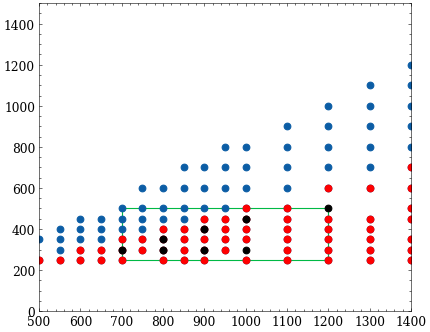

In [37]:
fig, ax = study.get_figax()
graph_array(available_6b[:,0], available_6b[:,1], g_linestyle='None', g_marker='o', figax='same')
graph_array(useable_8b[:,0], useable_8b[:,1], g_linestyle='None', g_marker='o', g_color='red', figax='same')
graph_array(available_8b[:,0], available_8b[:,1], g_linestyle='None', g_marker='o', g_color='black', figax='same', xlim=(500,1400), ylim=(0,1500))

ax.plot([700,1200,1200,700,700],[250,250,500,500,250])